# Example 2
This example demonstrates how to use the statistical test. 

# Packages

In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(0, "/Users/skojaku-admin/program/core-periphery-detection")
import cpnet
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

# import utils
from scipy import sparse

# Data 

In [2]:
G = nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


# Detect Core-periphery structure
Detect the core-periphery structure in the karate club network: 

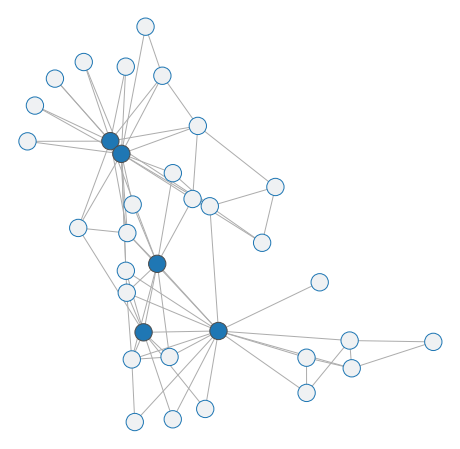

In [3]:
# Detect core-periphery structure
be = cpnet.BE()  # Call the BE algorithm
be.detect(G)  # Detect core-periphery structures
c = be.get_pair_id()  # Get the group membership of nodes
x = be.get_coreness()  # Get the coreness of nodes

# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.utils.plot_core_periphery_structure(G, c, x, ax)

# Statistical test

The core-periphery structure detected by any algorithm may be dubious. For example, an algorithm labels nodes as core or periphery even if the network is a regular random graph, which is supposed not to have core-periphery structure. Therefore, it is crutial to test the significance of the detected core-periphery structure.

A statistical test, *the q-s test*, is implemented in `cpnet` package, which can be performed by 

In [4]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, be, significance_level=0.01, num_of_thread=4
)

100%|██████████| 300/300 [00:02<00:00, 137.32it/s]


The `sig_c` and `sig_x` are the results of the statistical test, where `sig_c[i] = None` and `sig_x[i] = None` mean that node i is the *residual node*, i.e., nodes that do not belong to the significant core-periphery structure. 

Let's see which core-periphery pairs are significant. The `plot_core_periphery_structure` function draws the residual nodes as rectangles. 

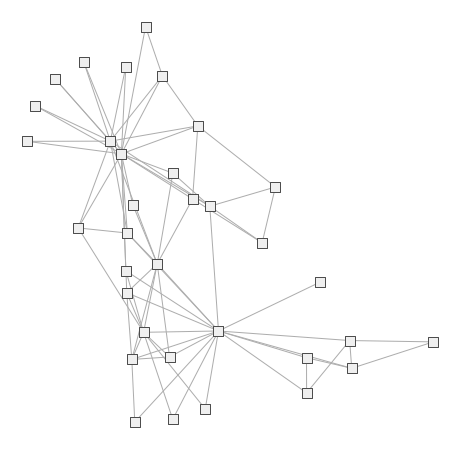

In [5]:
# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.plot_core_periphery_structure(G, sig_c, sig_x, ax, pos=pos)

The statistical test judges the detected core-periphery structure as insignificant. What does it mean? The BE algorithm detected a structure, where core nodes are densely interconnected while peripheral nodes are sparsely interconnected, which, by itself, agrees with the notion of core-periphery structure. That being said, compared to core-periphery structure detected in randomized networks, the detected core-periphery structure is not that strong. 

This result does not mean that the karate-club network does not have core-periphery structure.  To see this, we use the KM_config algorithm. 

100%|██████████| 300/300 [00:01<00:00, 245.26it/s]


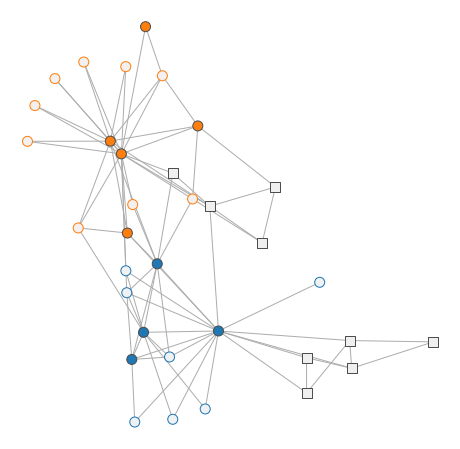

In [6]:
# Detect core-periphery structure
kmconfig = cpnet.KM_config()  # Call the BE algorithm
kmconfig.detect(G)  # Detect core-periphery structures
c = kmconfig.get_pair_id()  # Get the group membership of nodes
x = kmconfig.get_coreness()  # Get the coreness of nodes

# Significance test
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.01, num_of_thread=4
)

# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.plot_core_periphery_structure(G, sig_c, sig_x, ax, pos=pos)

The KM-config algorithm detected two significant core-periphery pairs in the karate club network. Some algorithms find significant core-periphery structure while other algorithms do not. This can be happened because the algorithms detect different core-periphery structures.